In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import random
import torch
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
from torchvision.models.detection import maskrcnn_resnet50_fpn
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
!pip install ultralytics

In [3]:
from ultralytics import YOLO

In [6]:
data_yaml_path = "/kaggle/input/weld-quality-inspection-instance-segmentation/Weld quality inspection - Segmentation/data.yaml"  # points to your custom dataset yaml
weights_path = "yolov8n-seg.pt"  # Use pretrained YOLOv8 segmentation weights


In [7]:
# Load model
model = YOLO(weights_path)

100%|██████████| 6.74M/6.74M [00:00<00:00, 58.0MB/s]


In [9]:
# Train the model on your dataset
model.train(data=data_yaml_path, epochs=50, imgsz=640, task="segment")

Ultralytics 8.3.146 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/weld-quality-inspection-instance-segmentation/Weld quality inspection - Segmentation/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train22, nbs=64, nms=False, opset=None, optimize=False, optimizer=aut

train: Scanning /kaggle/input/weld-quality-inspection-instance-segmentation/Weld quality inspection - Segmentation/train/labels... 1109 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1109/1109 [00:02<00:00, 538.39it/s]

train: /kaggle/input/weld-quality-inspection-instance-segmentation/Weld quality inspection - Segmentation/train/images/IMG_3647_block_1_2_png_jpg.rf.0796e002c87e60355b14a1a7e36e6128.jpg: 1 duplicate labels removed
train: /kaggle/input/weld-quality-inspection-instance-segmentation/Weld quality inspection - Segmentation/train/images/IMG_3647_block_1_2_png_jpg.rf.2122f7adcbe77d67d0a237c89bd8ea81.jpg: 1 duplicate labels removed
train: /kaggle/input/weld-quality-inspection-instance-segmentation/Weld quality inspection - Segmentation/train/images/IMG_3647_block_1_2_png_jpg.rf.3b1455b12ea1db0a62f22a332cd2d29f.jpg: 1 duplicate labels removed
train: /kaggle/input/weld-quality-inspection-instance-segmentation/Weld quality inspection - Segmentation/train/images/IMG_3647_block_1_2_png_jpg.rf.6462084eeebf7c80dbd01f48c88cc7d7.jpg: 1 duplicate labels removed
train: /kaggle/input/weld-quality-inspection-instance-segmentation/Weld quality inspection - Segmentation/train/images/IMG_3647_block_1_2_png_jp

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.7±0.3 ms, read: 78.8±28.6 MB/s, size: 59.8 KB)


val: Scanning /kaggle/input/weld-quality-inspection-instance-segmentation/Weld quality inspection - Segmentation/valid/labels... 191 images, 0 backgrounds, 0 corrupt: 100%|██████████| 191/191 [00:00<00:00, 562.42it/s]

val: /kaggle/input/weld-quality-inspection-instance-segmentation/Weld quality inspection - Segmentation/valid/images/IMG_3743_block_1_0_png_jpg.rf.543766cd632a2699c6fa14ad5851adbb.jpg: 1 duplicate labels removed
val: /kaggle/input/weld-quality-inspection-instance-segmentation/Weld quality inspection - Segmentation/valid/images/IMG_3743_block_1_1_png_jpg.rf.22a2e72846091adcd22c79d11c717244.jpg: 3 duplicate labels removed
WARNING ⚠️ val: Cache directory /kaggle/input/weld-quality-inspection-instance-segmentation/Weld quality inspection - Segmentation/valid is not writeable, cache not saved.


Plotting labels to runs/segment/train22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train22
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.36G       1.71      2.433      1.606      1.094        141        640: 100%|██████████| 70/70 [00:27<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all        191       1837      0.307      0.383      0.282      0.139      0.289      0.359       0.25     0.0996



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.96G      1.703      2.406      1.596      1.091         57        640: 100%|██████████| 70/70 [00:26<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        191       1837      0.357      0.275      0.231      0.101      0.324      0.247      0.208     0.0787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.98G       1.75      2.463       1.58      1.111         73        640: 100%|██████████| 70/70 [00:26<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all        191       1837      0.248      0.358       0.23      0.103      0.264      0.257      0.181      0.066



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50         5G       1.72      2.459      1.552      1.105        177        640: 100%|██████████| 70/70 [00:25<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        191       1837      0.296      0.246      0.216     0.0969      0.292      0.229      0.192     0.0704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.02G      1.765      2.483      1.544      1.113        350        640: 100%|██████████| 70/70 [00:26<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        191       1837       0.42      0.326      0.276      0.127      0.403      0.286      0.241     0.0948



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.04G      1.727      2.459      1.565      1.116        135        640: 100%|██████████| 70/70 [00:26<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

                   all        191       1837      0.363       0.34      0.279      0.125      0.329      0.302      0.236     0.0868



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.05G      1.728      2.406      1.483      1.104        125        640: 100%|██████████| 70/70 [00:26<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all        191       1837      0.327      0.407      0.311      0.137       0.33      0.331      0.273      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.07G      1.697       2.37      1.462      1.119         77        640: 100%|██████████| 70/70 [00:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all        191       1837      0.337      0.346      0.272       0.13      0.322      0.315      0.245      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.09G        1.7      2.389      1.433      1.094        136        640: 100%|██████████| 70/70 [00:26<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]

                   all        191       1837      0.408       0.33      0.296      0.143      0.399      0.304      0.275      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.11G      1.685      2.333      1.387      1.091        245        640: 100%|██████████| 70/70 [00:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        191       1837      0.347      0.375      0.292      0.143      0.396       0.35      0.281      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.12G      1.688      2.319      1.387      1.084        159        640: 100%|██████████| 70/70 [00:26<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]

                   all        191       1837      0.427      0.345      0.314      0.148      0.406      0.326      0.284      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.14G      1.662      2.315      1.371      1.078        206        640: 100%|██████████| 70/70 [00:25<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all        191       1837      0.463      0.337      0.318      0.158      0.459      0.303      0.269      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.16G      1.658      2.314      1.383      1.085         58        640: 100%|██████████| 70/70 [00:25<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all        191       1837      0.432      0.418      0.363      0.176      0.369      0.363      0.292      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.18G      1.659      2.299      1.347       1.08         80        640: 100%|██████████| 70/70 [00:25<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        191       1837      0.478      0.389      0.392      0.195      0.443      0.363       0.34      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50       5.2G      1.638      2.263      1.316      1.071         87        640: 100%|██████████| 70/70 [00:26<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all        191       1837      0.487      0.367       0.36       0.18      0.454      0.337      0.318      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.22G      1.605      2.235      1.287      1.065         70        640: 100%|██████████| 70/70 [00:26<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]

                   all        191       1837       0.49      0.396      0.387      0.201      0.467      0.357      0.345      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.24G      1.614      2.237      1.311      1.067         93        640: 100%|██████████| 70/70 [00:26<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]

                   all        191       1837      0.479       0.36       0.38      0.188      0.412       0.35       0.33      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.25G      1.617      2.246      1.266      1.052        134        640: 100%|██████████| 70/70 [00:26<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]

                   all        191       1837      0.417       0.42      0.383      0.182      0.378      0.382      0.342      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.84G      1.584      2.174      1.226      1.054        134        640: 100%|██████████| 70/70 [00:26<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]

                   all        191       1837      0.435      0.411      0.374      0.186      0.422      0.396      0.347      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.86G       1.57      2.156      1.239      1.044         82        640: 100%|██████████| 70/70 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        191       1837      0.473       0.42      0.407       0.21      0.435      0.407      0.374      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.87G      1.563       2.14      1.218      1.047        272        640: 100%|██████████| 70/70 [00:25<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]

                   all        191       1837      0.509      0.368      0.401      0.197      0.437      0.372      0.347      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.89G      1.589      2.155      1.208      1.046        182        640: 100%|██████████| 70/70 [00:26<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]

                   all        191       1837      0.476      0.419      0.414      0.207      0.457       0.36      0.361      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.91G      1.554      2.132      1.168      1.042        154        640: 100%|██████████| 70/70 [00:25<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]

                   all        191       1837      0.473      0.424      0.412      0.205      0.439      0.391      0.376      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.57G      1.548      2.126      1.179      1.036        130        640: 100%|██████████| 70/70 [00:25<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]

                   all        191       1837      0.512        0.4      0.407      0.213      0.507      0.397      0.394      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.59G      1.514      2.087      1.113       1.02        167        640: 100%|██████████| 70/70 [00:26<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]

                   all        191       1837      0.502      0.461      0.435      0.226      0.468       0.41      0.384      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.61G      1.543      2.089      1.143      1.035         95        640: 100%|██████████| 70/70 [00:25<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all        191       1837      0.489      0.448      0.439      0.229      0.484      0.386      0.387      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.63G      1.514      2.057      1.106      1.015        446        640: 100%|██████████| 70/70 [00:26<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all        191       1837      0.497      0.415      0.418       0.22      0.474      0.393       0.38      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.65G      1.492      2.055      1.115      1.021         97        640: 100%|██████████| 70/70 [00:26<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all        191       1837      0.506      0.439      0.431      0.222      0.468      0.408      0.374      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.37G      1.493      2.034      1.088      1.013        141        640: 100%|██████████| 70/70 [00:25<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all        191       1837      0.536      0.424      0.444      0.234      0.525      0.406      0.416      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.39G      1.487      2.018      1.085      1.012         66        640: 100%|██████████| 70/70 [00:25<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all        191       1837      0.493      0.414      0.422      0.226      0.458      0.372      0.378      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.55G      1.466      2.007      1.086      1.014         35        640: 100%|██████████| 70/70 [00:25<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        191       1837      0.549       0.44      0.449      0.244      0.501      0.428      0.417      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.11G      1.477      2.001      1.063      1.008        112        640: 100%|██████████| 70/70 [00:25<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]

                   all        191       1837      0.509      0.462      0.456      0.244      0.494      0.417      0.425      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.11G      1.475      2.006      1.049      1.008        109        640: 100%|██████████| 70/70 [00:26<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]

                   all        191       1837      0.521      0.492       0.47       0.25      0.508      0.477      0.447        0.2



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.11G      1.459      1.979      1.046      1.006        213        640: 100%|██████████| 70/70 [00:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all        191       1837      0.541      0.461      0.457      0.243      0.511      0.417      0.405      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.11G      1.445      1.974      1.024     0.9923        356        640: 100%|██████████| 70/70 [00:25<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all        191       1837      0.518      0.455      0.453      0.246        0.6      0.371      0.416      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.68G      1.438      1.961      1.022      1.002        110        640: 100%|██████████| 70/70 [00:25<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]

                   all        191       1837      0.498       0.48      0.487      0.263      0.577      0.401       0.44      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.68G      1.442      1.934      1.013     0.9951         82        640: 100%|██████████| 70/70 [00:26<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]

                   all        191       1837      0.512      0.504      0.496      0.265      0.517      0.452      0.457       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.68G      1.425       1.94     0.9959     0.9921         92        640: 100%|██████████| 70/70 [00:25<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]

                   all        191       1837      0.588      0.447      0.493      0.269      0.549       0.44      0.458      0.213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.68G      1.425      1.918     0.9959     0.9904        147        640: 100%|██████████| 70/70 [00:26<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]

                   all        191       1837      0.587      0.453      0.491      0.265      0.572      0.417       0.44      0.201



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.68G      1.409       1.91     0.9849     0.9946        176        640: 100%|██████████| 70/70 [00:26<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]

                   all        191       1837      0.549      0.498      0.493      0.266      0.522      0.462      0.456      0.205


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.68G      1.387      1.873     0.9655     0.9855         80        640: 100%|██████████| 70/70 [00:20<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all        191       1837       0.52      0.476       0.47       0.25      0.488      0.443      0.431      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.68G      1.381      1.842     0.9372      0.984        237        640: 100%|██████████| 70/70 [00:18<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]

                   all        191       1837      0.533       0.49       0.49      0.275      0.525      0.484      0.463      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.68G      1.359      1.837     0.9199     0.9818         19        640: 100%|██████████| 70/70 [00:18<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.73it/s]

                   all        191       1837       0.54      0.466      0.492      0.278      0.505      0.434      0.443      0.207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.68G      1.368       1.83     0.9055     0.9798         14        640: 100%|██████████| 70/70 [00:18<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.73it/s]

                   all        191       1837      0.597      0.423      0.487      0.275      0.582      0.396      0.447      0.209



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.68G      1.353      1.827     0.9041      0.975         49        640: 100%|██████████| 70/70 [00:18<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.76it/s]

                   all        191       1837      0.543      0.499       0.51      0.292       0.51      0.465      0.463      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.68G      1.337      1.796     0.8879     0.9722        273        640: 100%|██████████| 70/70 [00:18<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.74it/s]

                   all        191       1837       0.51       0.51      0.499      0.287      0.516      0.457      0.462       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50       5.7G      1.324      1.777     0.8738     0.9665         79        640: 100%|██████████| 70/70 [00:18<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.73it/s]

                   all        191       1837      0.518      0.529      0.502      0.289      0.487       0.49      0.456      0.211



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.71G      1.313      1.751     0.8588     0.9661         48        640: 100%|██████████| 70/70 [00:18<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        191       1837      0.568      0.487      0.507      0.293       0.49      0.492       0.47      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.74G      1.297      1.741     0.8516      0.964         67        640: 100%|██████████| 70/70 [00:18<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]

                   all        191       1837      0.568      0.494      0.508      0.296      0.548      0.464      0.479      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.75G        1.3      1.736     0.8351     0.9574         82        640: 100%|██████████| 70/70 [00:18<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]

                   all        191       1837      0.568      0.492      0.511      0.301      0.553      0.475      0.484      0.222



50 epochs completed in 0.380 hours.
Optimizer stripped from runs/segment/train22/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train22/weights/best.pt, 6.8MB

Validating runs/segment/train22/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,259,234 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/6 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  17%|█▋        | 1/6 [00:00<00:01,  2.92it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|███▎      | 2/6 [00:01<00:03,  1.22it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        191       1837      0.569      0.493       0.51        0.3       0.57      0.468      0.484      0.222
           Bad Welding         32         36      0.476      0.333      0.402      0.274      0.537      0.333      0.403      0.225
                 Crack         53         63      0.656      0.651      0.662       0.38       0.68      0.667       0.67      0.255
  Excess Reinforcement         29        138      0.437      0.241      0.226      0.101      0.481      0.255      0.243     0.0921
          Good Welding         43         55       0.66        0.6      0.631      0.441      0.595      0.535      0.561      0.333
              Porosity         52        639      0.523      0.626      0.564      0.299      0.512      0.586      0.524      0.223
              Spatters         31        906      0.664      0.506      0.576      0.308      0.613      0.434        0.5      0.205
Speed: 0.4ms preprocess, 3.4ms inference, 0.0ms loss, 3.2ms postproce

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cf62c1a82d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

In [10]:
inf_model = YOLO('/kaggle/working/runs/segment/train22/weights/best.pt')

In [13]:
results = inf_model('/kaggle/input/weld-quality-inspection-instance-segmentation/Weld quality inspection - Segmentation/test/images/11668_2014_9832_Fig2_HTML_jpg.rf.7c65de9d3424012fae9fb1659961dc01.jpg')


image 1/1 /kaggle/input/weld-quality-inspection-instance-segmentation/Weld quality inspection - Segmentation/test/images/11668_2014_9832_Fig2_HTML_jpg.rf.7c65de9d3424012fae9fb1659961dc01.jpg: 640x640 2 Cracks, 1 Good Welding, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 12.0ms postprocess per image at shape (1, 3, 640, 640)


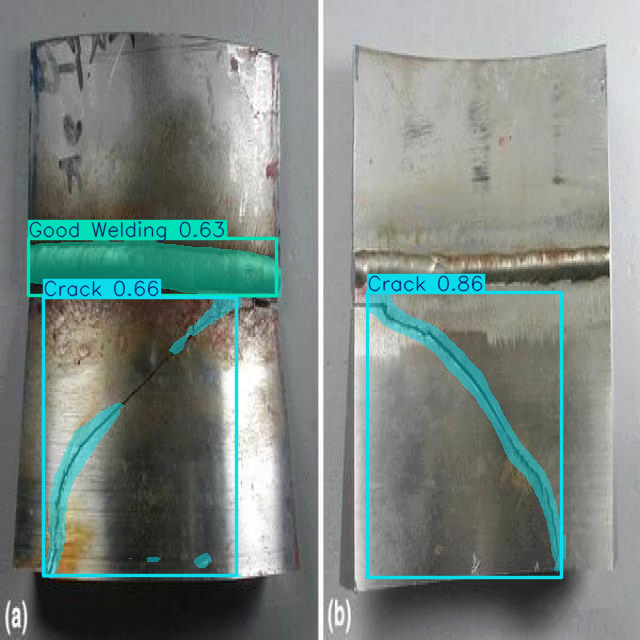

In [16]:
os.chdir('/kaggle/working/')
for result in results:
    result.show()
    result.save()